# Analisi Dataset Dummy #

#### Libraries Import ####

In [1]:
import pandas as pd
from langdetect import detect
from IPython.display import display
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np



#### DataSet Reading ####

In [2]:
df = pd.read_csv('C:/Users/Paolo/Documents/dati pseudo/data.csv', sep='___', engine='python')


#### Check language of the news ####

In [246]:

total_news = 0
en_news = 0
it_news = 0
foreign_news = 0


for news in df['news']:
    if(detect(news) == 'en'):
        en_news += 1
        total_news += 1
    if(detect(news) == 'it'):
        it_news += 1
        total_news += 1   
    if(detect(news) != 'en' and detect(news) != 'it'):
        foreign_news += 1
        total_news += 1


print('Total News: ', total_news )
print('Italian News: ', it_news)
print('English News: ', en_news)
print('Foreign News: ', foreign_news)



Total News:  1034
Italian News:  74
English News:  936
Foreign News:  24


Keeping just the english ones (approx. 90%)

In [3]:

for news in df['news']:
    if(detect(news) == 'it' or detect(news) != 'en'):
        df = df.drop((df.index[df["news"]== news].tolist()))
 
total_news = 0
en_news = 0
it_news = 0
foreign_news = 0

for news in df['news']:
    if(detect(news) == 'en'):
        en_news += 1
        total_news += 1
    if(detect(news) == 'it'):
        it_news += 1
        total_news += 1   
    if(detect(news) != 'en' and detect(news) != 'it'):
        foreign_news += 1
        total_news += 1


print('Total News: ', total_news )
print('Italian News: ', it_news)
print('English News: ', en_news)
print('Foreign News: ', foreign_news)

df.reset_index(drop=True, inplace=True)

Total News:  936
Italian News:  0
English News:  936
Foreign News:  0


#### Checking the most common categories to make a 5-top selection ####

In [247]:
#df = df.dropna()
#df.reset_index(inplace=True, drop=True)
#Counter(" ".join(df["category"]).split()).most_common(10)
#Counter(" ".join(df["category.1"]).split()).most_common(10)
#Counter(" ".join(df["category.2"]).split()).most_common(10)
#Counter(" ".join(df["category.3"]).split()).most_common(10)
#Counter(" ".join(df["category.4"]).split()).most_common(10)




[('NotList', 281),
 ('OHCHR-Reject', 164),
 ('Health-Effects', 90),
 ('RIO_Scope', 40),
 ('Content-For-DPKR-NorthKorea', 38),
 ('ET_SportPT', 36),
 ('Firma_opslag', 34),
 ('GeneralEconomicKeywords', 30),
 ('WesternBalkans-Politics2', 28),
 ('ET_SPORTFR', 26)]

#### Define categories for all the news ####
Adding a new column where the definitive category will be written.

In [4]:
df = df.reindex(columns = df.columns.tolist() + ["cate_def"])


Iterate all over the rows to put the most relevant category (from the 5 selected) in the definitive slot. Let's just recap the categories are ordered by importance, from the most important (category) to the least important (category.4), so when the slot is fullfilled is never more touched.

In [5]:
count = 0

for cate0, cate1, cate2, cate3, cate4, catedef in zip(df['category'], df['category.1'], df['category.2'], df['category.3'], df['category.4'], df['cate_def']):
    if(cate0 == 'Coronavirus' or cate0 == 'GeneralEconomicKeywords' or cate0 == 'ET_SPORTFR' or cate0 == 'Health-Effects' or cate0 == 'Treatment'):
        df.loc[count, 'cate_def'] = cate0
    elif((cate1 == 'Coronavirus' or cate1 == 'GeneralEconomicKeywords' or cate1 == 'ET_SPORTFR' or cate1 == 'Health-Effects' or cate1 == 'Treatment') and pd.isna(catedef)):
        df.loc[count, 'cate_def'] = cate1
    elif((cate2 == 'Coronavirus' or cate2 == 'GeneralEconomicKeywords' or cate2 == 'ET_SPORTFR' or cate2 == 'Health-Effects' or cate2 == 'Treatment')and pd.isna(catedef)):
        df.loc[count, 'cate_def'] = cate2
    elif((cate3  == 'Coronavirus' or cate3 == 'GeneralEconomicKeywords' or cate3 == 'ET_SPORTFR' or cate3 == 'Health-Effects' or cate3 == 'Treatment')and pd.isna(catedef)):
        df.loc[count, 'cate_def'] = cate3
    elif((cate4 == 'Coronavirus' or cate4 == 'GeneralEconomicKeywords' or cate4 == 'ET_SPORTFR' or cate4 == 'Health-Effects' or cate4 == 'Treatment') and pd.isna(catedef)):
        df.loc[count, 'cate_def'] = cate4
    count = count + 1


Drop all the no more useful column

In [6]:

df.drop('category', inplace=True, axis=1)
df.drop('category.1', inplace=True, axis=1)
df.drop('category.2', inplace=True, axis=1)
df.drop('category.3', inplace=True, axis=1)
df.drop('category.4', inplace=True, axis=1)

df = df[df['cate_def'].notna()]
df.reset_index(drop=True, inplace=True)

#### Check how the categories are distributed ####

(731, 4)
Economic News :  81
CoronaVirus News:  242
Sport News:  126
Treatment News:  115
Health-Effects News:  167


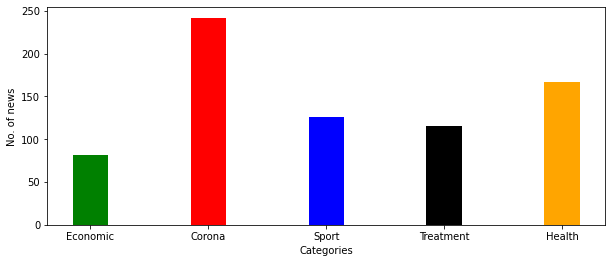

In [11]:
eco_count = 0
corona_count = 0
sport_count = 0
terapy_count = 0
health_count = 0

for categories in df['cate_def']:
    if(categories == 'Coronavirus'):
        corona_count += 1
    if(categories == 'Health-Effects'):
        health_count += 1
    if(categories == 'GeneralEconomicKeywords'):
        eco_count += 1
    if(categories == 'ET_SPORTFR'):
        sport_count += 1
    if(categories == 'Treatment'):
        terapy_count += 1

print('Economic News : ',eco_count)
print('CoronaVirus News: ', corona_count)
print('Sport News: ', sport_count)
print('Treatment News: ', terapy_count)
print('Health-Effects News: ',  health_count)

hist_categories_x = ['Economic', 'Corona', 'Sport', 'Treatment', 'Health']
hist_categories_y = [eco_count, corona_count, sport_count, terapy_count, health_count]

fig = plt.figure(figsize = (10, 4))

plt.bar(hist_categories_x, hist_categories_y, color =['green','red','blue','black','orange'], aa=True, width = 0.3)
plt.xlabel("Categories")
plt.ylabel("No. of news")
plt.show()